In [1]:
%% 变加速直线运动
%% const ax、var ax融合——2022年11月8日

%加速度a = 1+t %理论，估计值
%初始加速度 a0 = 1
%初速度 v0 = 1
%初始位置 p0 = 0
%flag = 0 未忽略高次项
%flag = 1 忽略高次项
%% 代码
clc
clear all;
close  all;

flag = 0;                 %高次项参与， 状态转移矩阵！！！
if flag == 0
    A=[1,1,0.5;0,1,1;0,0,1];  %未忽略高次项   转移矩阵！！！
elseif flag == 1
    A=[1,1,0;0,1,1;0,0,1];    %忽略高次项
end
A;
%H=[1,0,0];  %观测阵，pos
H=[0,0,1];    %观测转移矩阵 v

step=25;      %25s即可到120kph
Voice1=normrnd(0,0.05,1,step);
Voice2=normrnd(0,0.1,1,step);

%观测值,v
%true_x=33.3*(1.842-1.78*e.^(-0.03*(0:step-1)));

%观测值
true_var1=1.78*exp(1).^(-0.03*(0:step-1));
true_var2=2.5*1.78*exp(1).^(-0.01*(0:step-1));  %改为exp(1)
%exp(1)

In [2]:

%true_var2=5;
temp_var1=true_var1+Voice1(1,:);  %观测
temp_var2=true_var2+Voice2(1,:);  %观测


position = zeros(1,step+1);   %记录数据
speed = zeros(1,step+1);
acc = zeros(1,step+1);

Q=[0.01,0,0;0,0.01,0;0,0,0.01];  %系统噪声
R1=[0.03];   %量测噪声
R2=[0.1];    %量测噪声
Pk=[1,0,0;0,1,0;0,0,1];
x = [0 0 3]';%初始0 0 3

position(1) = x(1);
speed(1) = x(2);
acc(1) = x(3);



In [3]:

for i=1:step
    if flag == 0
        x_ = A * x + [1/6;1/2;1]; %①  %未忽略高次项
    elseif flag == 1
        x_ = A * x + [0;0;1];     %①  %忽略高次项
    end
    Pk_ = A * Pk * A' + Q ;                 %②

    Kk = (Pk_ * H')/(H * Pk_ * H' + R1);     %③
    x = x_ + Kk * (temp_var1(i)-H*x_);      %④
    Pk = (diag([1 1 1 ]) - Kk * H) * Pk_;   %⑤

    x_=x;
    Pk_=Pk;

    Kk = (Pk_ * H')/(H * Pk_ * H' + R2);     %③
    x = x_ + Kk * (temp_var2(i)-H*x_);      %④
    Pk = (diag([1 1 1 ]) - Kk * H) * Pk_;   %⑤

    position(i+1) = x(1);
    speed(i+1) = x(2);
    acc(i+1) = x(3);
end

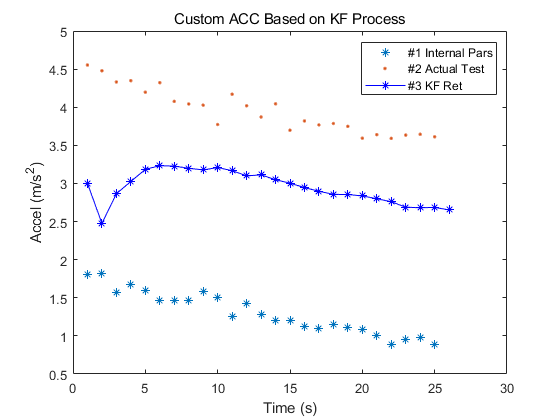

In [7]:


%
%% 绘图
%figure(1)
%plot(temp_x)  %观测位置
%hold on
%plot(position,'*-')    %估计位置
%title("position")
%
%figure(2)
%plot(temp_x)  %观测
%hold on
%plot(speed,'*-')  %估计速度
%title("velocity")

%figure
%plot(Voice1,'.')
%hold on
%plot(Voice2,'*')

figure(3)
plot(temp_var1,'*')  %观测
hold on
plot(temp_var2,'.')  %观测
hold on
plot(acc,'b*-') %估计加速度
xlabel('Time (s)')
ylabel('Accel (m/s^2)')
legend('#1 Internal Pars','#2 Actual Test','#3 KF Ret')
title("Custom ACC Based on KF Process")